In [2]:
import tensorflow as tf
import pandas as pd
import random
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import time


In [3]:
# data =[]
# lst = ['a','b','c']
# for i in lst:
#     data.append(["this string numbererd"+i,0])
# print (data)
# random.shuffle(data)
# images = [i[0] for i in data]
# label = [i[1] for i in data]
# print (images)
# print(label)

In [4]:
# path = "/home/diety/Desktop/Vidhu/New folder/malaria/cell-images-for-detecting-malaria/cell_images"
# Label = os.listdir(path)
# data = []
# uninfected = os.listdir(path+'/'+Label[0])
# infected = os.listdir(path+'/'+Label[1])
# for i in uninfected:
#     data.append([i,0])
# for i in infected:
#     data.append([i,1])
# data_train = data.sample(frac =0.8,random_state = 100)
# data_test = data.drop(data_train.index)
# random.shuffle(data)
# images_train = [i[0] for i in data_train]
# labels_train = [i[1] for i in data_train]
# images_test = [i[0] for i in data_test]
# labels_test = [i[1] for i in data_test]
# print("train",images_train.shape, labels_train.shape)
# print("test",images_test.shape, labels_test.shape)

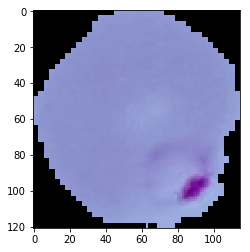

In [5]:
name = "malaria_dataset-{}".format(int(time.time()))

dir_path = "/home/diety/Desktop/Vidhu/New folder/malaria/cell-images-for-detecting-malaria/cell_images"
CATEGORIES = ["Parasitized","Uninfected"]

for category in CATEGORIES:
    path = os.path.join(dir_path,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show
        break
    break

In [6]:
# new_array = cv2.resize(img_array,(30,30))
# plt.imshow(new_array)
# plt.show


In [7]:
training_data =[]

def create_training_data():
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)

        path = os.path.join(dir_path,category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                img_array = cv2.resize(img_array,(60,60))
                training_data.append([img_array,class_num])
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))
                
create_training_data()

general exception OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
 /home/diety/Desktop/Vidhu/New folder/malaria/cell-images-for-detecting-malaria/cell_images/Parasitized/Thumbs.db
general exception OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
 /home/diety/Desktop/Vidhu/New folder/malaria/cell-images-for-detecting-malaria/cell_images/Uninfected/Thumbs.db


In [8]:
print(len(training_data))
random.shuffle(training_data)


27558


In [9]:
import numpy as np
X=[]
y=[]
for feat,label in training_data:
    X.append(feat)
    y.append(label)
    
X= np.array(X).reshape(-1,60,60,3)

In [10]:
X=X/255.0
tensorboard = TensorBoard(log_dir = "logs/{}".format(name))
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape = X.shape[1:],activation = 'relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    #tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
    #tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    #tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
    
])

model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

model.fit(X,y,validation_split= 0.1,epochs=5,callbacks=[tensorboard])

Train on 24802 samples, validate on 2756 samples
Epoch 1/5
24802/24802 [==============================] - 633s 26ms/sample - loss: 0.6747 - accuracy: 0.5937 - val_loss: 0.6535 - val_accuracy: 0.6430
Epoch 2/5
24802/24802 [==============================] - 623s 25ms/sample - loss: 0.6270 - accuracy: 0.6533 - val_loss: 0.6306 - val_accuracy: 0.6466
Epoch 3/5
24802/24802 [==============================] - 621s 25ms/sample - loss: 0.5992 - accuracy: 0.6807 - val_loss: 0.6272 - val_accuracy: 0.6644
Epoch 4/5
24802/24802 [==============================] - 633s 26ms/sample - loss: 0.5756 - accuracy: 0.7051 - val_loss: 0.6317 - val_accuracy: 0.6567
Epoch 5/5
24802/24802 [==============================] - 643s 26ms/sample - loss: 0.5435 - accuracy: 0.7272 - val_loss: 0.6521 - val_accuracy: 0.6437
